# Poisoned Mushroom Dataset

We are going to take a quick tour of machine learning by working on an example dataset. The mushroom dataset
categorizes mushrooms as 'poisonous' or 'edible' and collects several descriptive properties of each mushroom example.

In [3]:
import os
import pandas as pd

## Loading the dataset

In [4]:
data_root = "data/"
filename = "mushroom.csv"
filepath = os.path.join(data_root, filename)
df = pd.read_csv(filepath)
df

,class,cap-shape,cap-surface,cap-color,ruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,f,n,f,n,f,w,n,b,...,y,w,p,NaN,n,o,p,w,v,NaN
1,p,NaN,y,g,t,NaN,f,c,b,k,...,s,n,c,p,w,n,e,NaN,y,g
2,e,b,y,n,t,n,f,c,NaN,n,...,s,p,NaN,p,w,o,p,b,y,w
3,e,x,g,g,t,n,f,w,b,n,...,s,p,NaN,p,w,n,n,NaN,NaN,d
4,e,NaN,f,NaN,t,n,a,w,n,n,...,k,NaN,w,p,w,NaN,l,w,v,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25981,e,f,NaN,r,f,n,f,NaN,n,NaN,...,NaN,n,p,p,w,o,p,k,v,NaN
25982,e,f,s,e,f,NaN,f,c,n,y,...,y,w,p,p,w,NaN,p,r,y,d
25983,p,f,g,e,NaN,NaN,a,c,b,b,...,y,w,NaN,p,w,o,p,h,v,m
25984,e,x,g,g,t,n,f,w,b,h,...,f,NaN,NaN,p,w,t,e,NaN,s,NaN


In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,ruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,25986,22513,22507,22527,22514,22536,22505,22587,22494,22418,...,22563,22413,22553,22489,22483,22497,22478,22493,22475,22502
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,14354,7674,7602,4810,12361,6986,17811,16092,13997,3679,...,10619,8580,8403,22489,15742,15713,8501,5085,8409,6573


## Data Exploration

Show all the columns. Notice the target is the first column!

In [6]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'ruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

Get the size of the dataframe

In [7]:
df.shape

(25986, 23)

Let's peek at the target

In [8]:
df['class']

0        e
1        p
2        e
3        e
4        e
        ..
25981    e
25982    e
25983    p
25984    e
25985    e
Name: class, Length: 25986, dtype: object

This dataset has a LOT of "N/A" datapoints. One way to clean the data is to drop all affected rows

In [9]:
df.dropna().shape

(1153, 23)

But this *significantly* reduces our dataset. Let's instead use a data imputation strategy that fills the N/A with the *mode*

In [10]:
for c in df.columns:
    df = df.fillna({c: df[c].mode()[0]})

Look at df again

In [11]:
df

,class,cap-shape,cap-surface,cap-color,ruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,f,n,f,n,f,w,n,b,...,y,w,p,p,n,o,p,w,v,d
1,p,x,y,g,t,n,f,c,b,k,...,s,n,c,p,w,n,e,w,y,g
2,e,b,y,n,t,n,f,c,b,n,...,s,p,w,p,w,o,p,b,y,w
3,e,x,g,g,t,n,f,w,b,n,...,s,p,w,p,w,n,n,w,v,d
4,e,x,f,n,t,n,a,w,n,n,...,k,w,w,p,w,o,l,w,v,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25981,e,f,y,r,f,n,f,c,n,b,...,s,n,p,p,w,o,p,k,v,d
25982,e,f,s,e,f,n,f,c,n,y,...,y,w,p,p,w,o,p,r,y,d
25983,p,f,g,e,f,n,a,c,b,b,...,y,w,w,p,w,o,p,h,v,m
25984,e,x,g,g,t,n,f,w,b,h,...,f,w,w,p,w,t,e,w,s,d


Let's see what the classifications are and how balanced the dataset is.

In [12]:
df['class'].value_counts()

class
e    14354
p    11632
Name: count, dtype: int64

We'll introduce a new plotting library -- "seaborn", which has some advantages over matplotlib. Here we show how to quickly make a histogram from a dataframe. Seaborn works nicely with pandas dataframes.

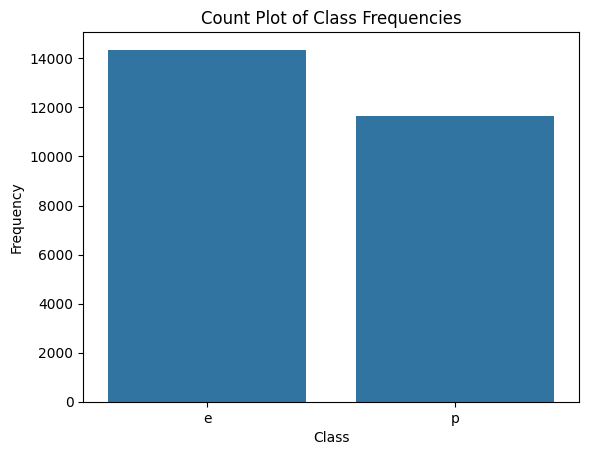

In [13]:
import seaborn as sns
from matplotlib import pyplot as plt

# Count plot
sns.countplot(x='class', data=df)
plt.title('Count Plot of Class Frequencies')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


As another example let's plot the "cap color" feature.

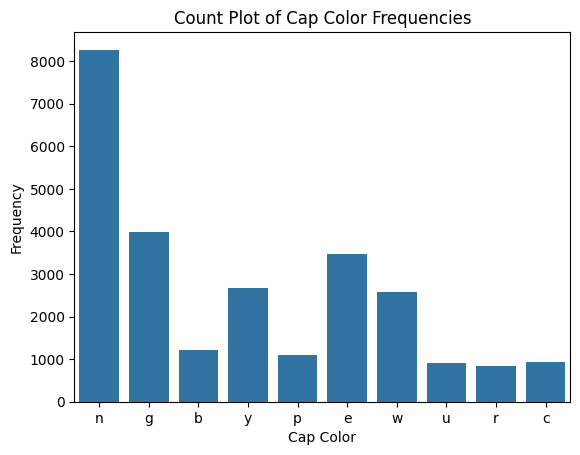

In [14]:
# Count plot
sns.countplot(x='cap-color', data=df, )
plt.title('Count Plot of Cap Color Frequencies')
plt.xlabel('Cap Color')
plt.ylabel('Frequency')
plt.show()


I wonder how the color correlates to the outcome -- are some color more poisonous? We'll do some pandas work to make this summary for us.

In [15]:
# Count observations by color and toxicity
counts = df.groupby(['cap-color', 'class']).size().reset_index(name='count')

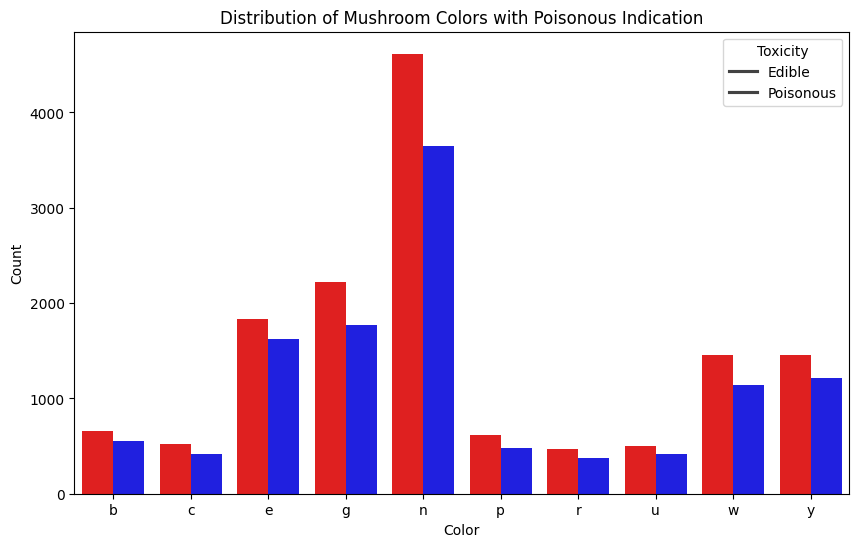

In [16]:
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='cap-color', y='count', hue='class', data=counts, palette={'p': 'blue', 'e': 'red'})

# Add plot title and labels
plt.title('Distribution of Mushroom Colors with Poisonous Indication')
plt.xlabel('Color')
plt.ylabel('Count')
plt.legend(title='Toxicity', labels=['Edible', 'Poisonous'])

# Show the plot
plt.show()

In [17]:
df.describe()

,class,cap-shape,cap-surface,cap-color,ruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,25986,25986,25986,25986,25986,25986,25986,25986,25986,25986,...,25986,25986,25986,25986,25986,25986,25986,25986,25986,25986
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,14354,11147,11081,8269,15833,10436,21292,19491,17489,7247,...,14042,12153,11836,25986,19245,19202,12009,8578,11920,10057


In [18]:
# Count observations by odor and toxicity
counts = df.groupby(['odor', 'class']).size().reset_index(name='count')

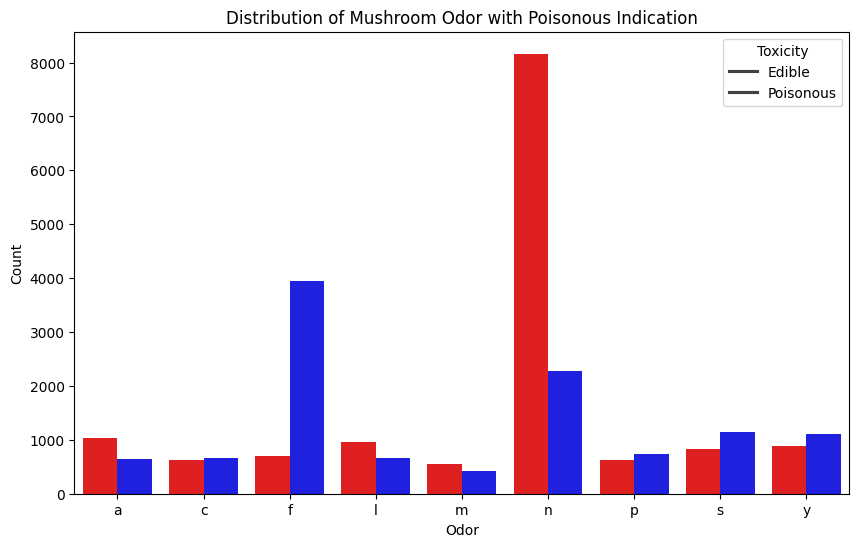

In [19]:
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='odor', y='count', hue='class', data=counts, palette={'p': 'blue', 'e': 'red'})

# Add plot title and labels
plt.title('Distribution of Mushroom Odor with Poisonous Indication')
plt.xlabel('Odor')
plt.ylabel('Count')
plt.legend(title='Toxicity', labels=['Edible', 'Poisonous'])

# Show the plot
plt.show()

## Correlation matrix heat map

Let's get a quick visual representation of the relationshop between features in this dataset. We'll use a version of a Chi-Squared test on all pairs $(n,m)$ of features in the dataset, including the target

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (0.01 + n * (min(r, k) - 1)))

categorical_columns = df.select_dtypes(include=['object', 'category']).columns
corr_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        corr_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Convert to numeric values for plotting
corr_matrix = corr_matrix.astype(float)
corr_matrix

,class,cap-shape,cap-surface,cap-color,ruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,0.999922,0.030397,0.043075,0.020084,0.089974,0.465191,0.001138,0.063779,0.122908,0.088500,...,0.102529,0.050202,0.044377,0.0,0.005063,0.022175,0.092049,0.124672,0.063370,0.053764
cap-shape,0.030397,1.000000,0.011547,0.020761,0.014305,0.020779,0.008688,0.017270,0.017995,0.020523,...,0.017404,0.018379,0.017432,0.0,0.017128,0.007926,0.012183,0.016205,0.018208,0.015867
cap-surface,0.043075,0.011547,1.000000,0.022589,0.008736,0.024878,0.015569,0.027291,0.020465,0.025335,...,0.012060,0.022897,0.021619,0.0,0.012788,0.016706,0.014214,0.016301,0.022058,0.020441
cap-color,0.020084,0.020761,0.022589,1.000000,0.021542,0.022804,0.017171,0.023427,0.021974,0.024858,...,0.016909,0.024867,0.020831,0.0,0.017487,0.015235,0.023721,0.019681,0.023478,0.022749
ruises,0.089974,0.014305,0.008736,0.021542,0.999919,0.043431,0.002767,0.015149,0.011158,0.041328,...,0.021659,0.027672,0.031543,0.0,0.006508,0.011759,0.037341,0.034545,0.014283,0.026531
odor,0.465191,0.020779,0.024878,0.022804,0.043431,1.000000,0.017001,0.026458,0.046978,0.027601,...,0.031568,0.025946,0.023086,0.0,0.015490,0.019458,0.030861,0.032236,0.026293,0.021654
gill-attachment,0.001138,0.008688,0.015569,0.017171,0.002767,0.017001,0.999870,0.004789,0.007753,0.023883,...,0.011742,0.020285,0.021662,0.0,0.010471,0.004408,0.010966,0.010641,0.012992,0.012999
gill-spacing,0.063779,0.017270,0.027291,0.023427,0.015149,0.026458,0.004789,0.999897,0.011227,0.021896,...,0.014541,0.022406,0.028543,0.0,0.008439,0.013913,0.013069,0.018936,0.027893,0.029246
gill-size,0.122908,0.017995,0.020465,0.021974,0.011158,0.046978,0.007753,0.011227,0.999912,0.031602,...,0.009570,0.027692,0.030796,0.0,0.004786,0.008013,0.039065,0.041701,0.025668,0.023956
gill-color,0.088500,0.020523,0.025335,0.024858,0.041328,0.027601,0.023883,0.021896,0.031602,1.000000,...,0.031451,0.023405,0.027307,0.0,0.019835,0.019987,0.033363,0.031731,0.029769,0.026966


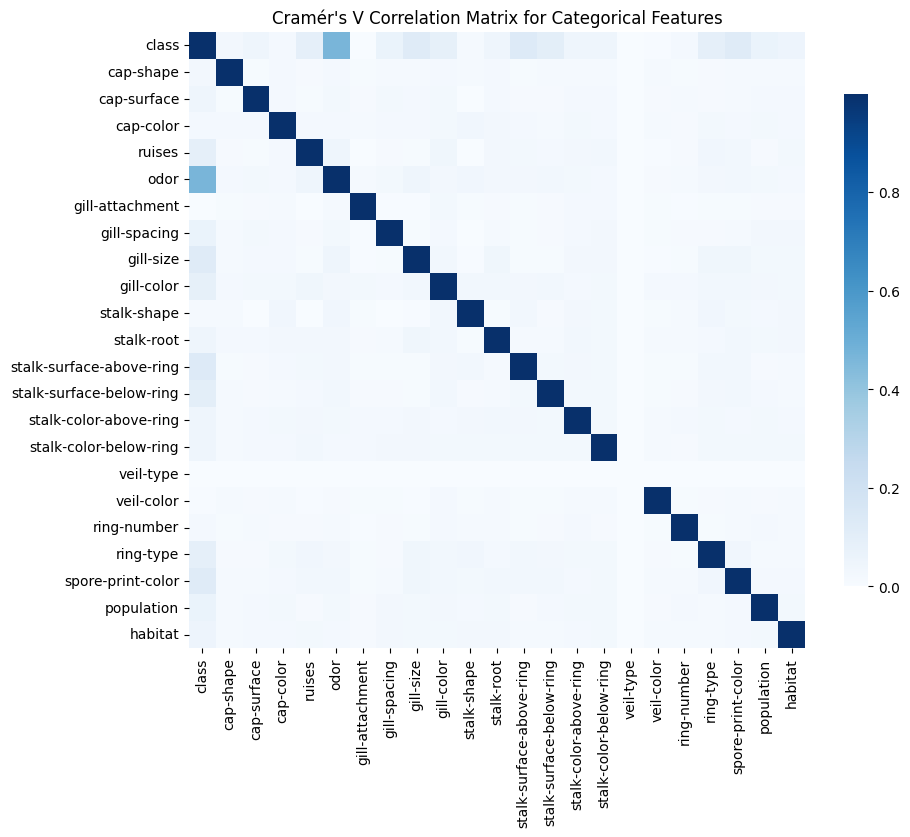

In [21]:
# Plotting the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=False, cmap='Blues', square=True, cbar_kws={"shrink": .8})
plt.title("Cramér's V Correlation Matrix for Categorical Features")
plt.show()

Which features seem to be important?

In [22]:
corr_matrix['class'][corr_matrix['class']>0.1]

class                       0.999922
odor                        0.465191
gill-size                   0.122908
stalk-surface-above-ring    0.129749
stalk-surface-below-ring    0.102529
spore-print-color           0.124672
Name: class, dtype: float64

## Data Modeling

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv(filepath)
X = df.drop('class', axis = 1)
y = df['class']

X = pd.get_dummies(X)
X.describe()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,25986,25986,25986,25986,25986,25986,25986,25986,25986,25986,...,25986,25986,25986,25986,25986,25986,25986,25986,25986,25986
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,23726,24509,19264,23074,24518,18312,19762,23825,19466,18384,...,22365,17577,21675,19413,21040,23275,24278,22840,24129,24425


### Decision Tree Classifier

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=10, criterion='entropy')

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6706425548287803
Classification Report:
              precision    recall  f1-score   support

           e       0.70      0.71      0.70      2873
           p       0.63      0.63      0.63      2325

    accuracy                           0.67      5198
   macro avg       0.67      0.67      0.67      5198
weighted avg       0.67      0.67      0.67      5198



In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix(y_test, y_pred)

array([[2029,  844],
       [ 868, 1457]])

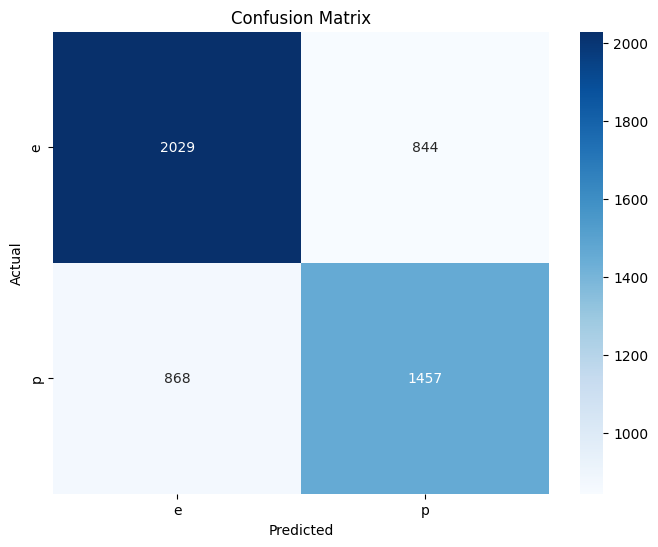

In [32]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Testing more methods

In [33]:

def classifier_tryout(clf, X_train, y_train, X_test, y_test):
	clf.fit(X_train, y_train)

	# Make predictions
	y_pred = clf.predict(X_test)

	# Evaluate the model
	accuracy = accuracy_score(y_test, y_pred)
	print(f"Accuracy: {accuracy}")

	print("Classification Report:")
	print(classification_report(y_test, y_pred))
    

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42, class_weight={'e':100, 'p':1})
classifier_tryout(clf, X_train, y_train, X_test, y_test)

### Support Vector Machines

In [ ]:
from sklearn.svm import SVC

# Initialize the RandomForestClassifier
clf = SVC(random_state=42, kernel='rbf')
classifier_tryout(clf, X_train, y_train, X_test, y_test)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the LogisticRegression
clf = LogisticRegression(random_state=42)
classifier_tryout(clf, X_train, y_train, X_test, y_test)

### k-Nearest Neighbors

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNeighborsClassifier
clf = KNeighborsClassifier(weights='uniform')
classifier_tryout(clf, X_train, y_train, X_test, y_test)

Accuracy: 0.6854559445940747
Classification Report:
              precision    recall  f1-score   support

           e       0.70      0.76      0.73      2873
           p       0.67      0.60      0.63      2325

    accuracy                           0.69      5198
   macro avg       0.68      0.68      0.68      5198
weighted avg       0.68      0.69      0.68      5198



### GradientBoost 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=42)
classifier_tryout(clf, X_train, y_train, X_test, y_test)

### Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLPClassifier
clf = MLPClassifier(random_state=42, hidden_layer_sizes=(1000,10,), learning_rate='adaptive')
classifier_tryout(clf, X_train, y_train, X_test, y_test)

## Cross Validation and Grid Search

In [ ]:
from sklearn.model_selection import cross_val_score
model = KNeighborsClassifier()

In [38]:
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Accuracy: {scores.mean(): 0.2f} (+/- {scores.std() * 2:0.2f})")

Accuracy:  0.68 (+/- 0.01)


Cross validation shows the earlier KNN model wasn't that much of an outlier, since the accuracy is the same. However, it's not a y good model.

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
pipeline = make_pipeline(KNeighborsClassifier())

# Define parameter grid
param_grid = {
    'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 10, 15, 20, 25, 30],
    'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy')
print(grid_search)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5,
                                                               10, 15, 20, 25,
                                                               30]},
             scoring='accuracy')


In [46]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5,
                                                               10, 15, 20, 25,
                                                               30]},
             scoring='accuracy')

In [47]:
knn_cv_results = pd.DataFrame(grid_search.cv_results_)

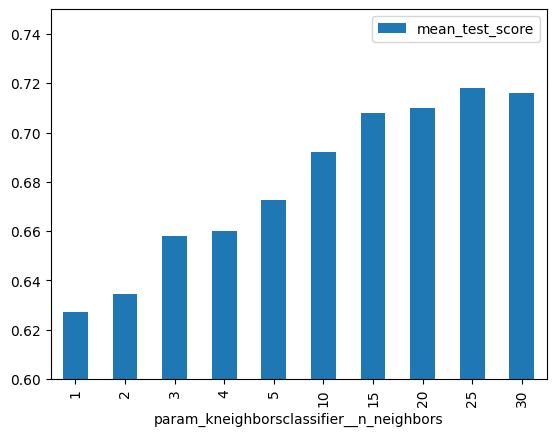

In [51]:
knn_cv_results.plot(x='param_kneighborsclassifier__n_neighbors', y='mean_test_score',
                   kind='bar',ylim=(0.6,0.75));

In [52]:
knn_cv_results.sort_values(by="mean_test_score", ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsclassifier__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
8,0.029362,0.009488,2.517480,0.448846,25,{'kneighborsclassifier__n_neighbors': 25},0.726118,0.713523,0.714389,0.718010,0.005744,1
9,0.023063,0.004097,2.123195,0.149445,30,{'kneighborsclassifier__n_neighbors': 30},0.723665,0.711069,0.713379,0.716038,0.005475,2
7,0.028776,0.008234,2.268454,0.313690,20,{'kneighborsclassifier__n_neighbors': 20},0.716017,0.706307,0.707317,0.709880,0.004359,3
6,0.027723,0.006684,2.385425,0.345548,15,{'kneighborsclassifier__n_neighbors': 15},0.718038,0.702554,0.703565,0.708052,0.007073,4
5,0.020268,0.001937,2.074765,0.152667,10,{'kneighborsclassifier__n_neighbors': 10},0.698268,0.689854,0.687978,0.692034,0.004475,5
4,0.017549,0.002803,2.137721,0.327277,5,{'kneighborsclassifier__n_neighbors': 5},0.674892,0.670371,0.672824,0.672696,0.001848,6
3,0.025017,0.002454,2.216839,0.179946,4,{'kneighborsclassifier__n_neighbors': 4},0.660895,0.664887,0.654207,0.659996,0.004406,7
2,0.020315,0.002515,2.278277,0.015662,3,{'kneighborsclassifier__n_neighbors': 3},0.659452,0.658825,0.655506,0.657928,0.001731,8
1,0.021687,0.003824,2.220745,0.104031,2,{'kneighborsclassifier__n_neighbors': 2},0.632179,0.635878,0.635590,0.634549,0.001680,9
0,0.026571,0.006583,2.080651,0.249338,1,{'kneighborsclassifier__n_neighbors': 1},0.626118,0.631693,0.623467,0.627093,0.003428,10


The best accuracy ended up being around 72%, with 25 neighbors.